<a href="https://colab.research.google.com/github/JosenildoJunior/Competicao_ML/blob/main/11%C2%AA_CompeticaoFLAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Entendimento do problema**

O departamento de crédito de um banco deseja automatizar o processo de tomada de
decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto
de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser
feito.

# **2. Obtenção dos dados**

O departamento de crédito de um banco deseja automatizar o processo de tomada de
decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto
de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser
feito.


**Permitindo o acesso do Google Colab ao Drive**

  Esse passo é necessário para que seja possivel importar dados diretamente do drive

In [94]:
# "Montando" o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando as bibliotecas**

**Para fazer as analises é necessario importar algumas bibliotecas previamente, nesse caso estou importando o pandas para manipulação de dados, também estão sendo importadas o pyplot e o seaborn para visualização dos dados.**

In [95]:
# Importações iniciais
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**Importação dos dados**

In [96]:
# Fonte:

# Dados de treino
df = pd.read_csv('/content/drive/MyDrive/Dados/treinoFLAI_competicao.csv')

# Ajustando a ordem das colunas DF
df.sort_index(axis=1, inplace = True)

# Visualizando as primeiras linhas do DF
df.head()

,Atrasos,Cliente,Emprego,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,bom pagador,Outros,19468.0,Reforma,33.0,0.0,0.0,39.2%,185.6,0.50,309447.00
1,0.0,bom pagador,Outros,91688.0,Diversas,41.0,1.0,0.0,NaN,234.5,15.25,449020.00
2,0.0,bom pagador,Outros,34226.0,Reforma,10.0,0.0,0.0,37.2%,250.5,1.25,164394.70
3,0.0,bom pagador,Outros,48356.0,Diversas,26.0,3.0,1.0,29.0%,230.4,2.25,270592.64
4,0.0,bom pagador,Professional,64684.0,Diversas,18.0,0.0,0.0,21.0%,93.6,3.75,78167.16


*No conjunto de dados temos as seguintes variáveis*
* Cliente [Variável Resposta]: bom pagador é aquele que pagou a sua dívida corretamente, mau
pagador é aquele que não pagou ou teve atrasos muito grandes em seu pagamento.
* Empréstimo: Valor emprestado ao cliente.
* ValorDoBem: Valor do bem que o cliente está colocando como garantia (em geral, são imóveis).
* Finalidade: Motivo pelo qual o empréstimo está sendo tomado.
* Emprego: Tipo de emprego do cliente.
* TempoEmprego: Tempo em anos que o cliente tem no seu emprego atual.
* Negativos: Número de prerrogativas negativas do cliente (por exemplo, pendências com IPTU,
IPVA, conta de luz, cartão de crédito, etc).
* Atrasos: Número de linhas de crédito que o cliente já entrou em atraso.
* TempoCliente: Tempo do cliente na instituição (em meses).
* LC-Recente: Número de linhas de crédito recentes (adquiridas nos últimos 2 anos).
* LC-Atual: Número de linhas de crédito atuais.
* RDS: Relação Débito/Salário - A porcentagem do salário anual do cliente comprometida em débitos.

# **3. Analise exploratória dos dados**





**Objetivos**: 

* Identificar o tipo de cada variável (numérica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar padrões de fraudes

In [97]:
# Visão geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Atrasos       3198 non-null   float64
 1   Cliente       3300 non-null   object 
 2   Emprego       3300 non-null   object 
 3   Empréstimo    3300 non-null   float64
 4   Finalidade    3300 non-null   object 
 5   LC-Atual      3300 non-null   float64
 6   LC-Recente    3300 non-null   float64
 7   Negativos     3122 non-null   float64
 8   RDS           2647 non-null   object 
 9   TempoCliente  3300 non-null   float64
 10  TempoEmprego  3122 non-null   float64
 11  ValorDoBem    3300 non-null   float64
dtypes: float64(8), object(4)
memory usage: 309.5+ KB


In [98]:
# Observando as dimensões do DataFrame
df.shape

(3300, 12)

É possível observar que esse dataset tem 3300 entradas e 12 colunas.

Os dados se enquadram em duas categorias:

* **Variáveis numéricas: Empréstimo, ValorDoBem, TempoEmprego, Negativos, Atrasos, TempoCliente, LC-Recente e LC-Atual**

* **Variáveis categóricas: Finalidade, Emprego e RDS.**

**Identificando a variável alvo:**

O objetivo é é avaliar os dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser feito. Assim, a variável **'Cliente'** é a variável adequada para alcançar os objetivos propostos.

In [99]:
# Observando os dados 
df.describe()

,Atrasos,Empréstimo,LC-Atual,LC-Recente,Negativos,TempoCliente,TempoEmprego,ValorDoBem
count,3198.000000,3300.000000,3300.000000,3300.000000,3122.000000,3300.000000,3122.000000,3.300000e+03
mean,0.413696,58841.030909,21.763333,1.153333,0.212684,182.681818,9.475208,3.256274e+05
std,1.087892,34109.356093,9.900538,1.695742,0.726832,86.159247,7.540252,1.757902e+05
min,0.000000,4710.000000,0.000000,0.000000,0.000000,1.100000,0.000000,2.512000e+04
25%,0.000000,35796.000000,15.000000,0.000000,0.000000,119.450000,3.500000,2.151960e+05
50%,0.000000,52438.000000,20.000000,1.000000,0.000000,177.200000,7.750000,2.884828e+05
75%,0.000000,73162.000000,27.000000,2.000000,0.000000,232.750000,13.750000,3.800829e+05
max,15.000000,279460.000000,67.000000,18.000000,10.000000,1170.200000,41.250000,2.687554e+06


Nossos clientes tem em média 58 mil em emprestimos, os clientes têm em média 9 anos em empregos, a maioria dos clientes não tem muitas prerrogativas negativas, os clientes não costumam atrasar muito suas linhas de créditos, nossos clientes têm em média 182 meses como clientes, nos últimos 2 anos nossos clientes pegaram em média uma linha de crédito e atualmente nossos clientes tem em média 21 linhas de créditos.

## Alterando os valores da variável alvo

O tipo da variável alvo está como categórica, isso pode dificultar o funcionamento do modelo que vai ser criado, sendo assim faz se necessário um tratamento nessa variável.

In [100]:
# Observando os valores presentes na variável
df['Cliente'].value_counts(normalize = True)

bom pagador    0.813939
mau pagador    0.186061
Name: Cliente, dtype: float64

*Podemos notar que na base temos 81,39% de bons pagadores equanto os outros 18,60% são maus pagadores*

Criando função para realizar o tratamento necessário na variável 'Cliente'

In [101]:
# Criando uma função para substituir os valores
def aux(x):
    if x == 'bom pagador':
        return 0
    elif x == 'mau pagador':
        return 1 

# Aplicando a função na coluna cliente
df['Cliente'] = df['Cliente'].apply(aux) 

*Conferindo como ficou a variável após a função ter sido aplicada.*

In [102]:
# Observando os valores presentes na variável
df['Cliente'].value_counts()

0    2686
1     614
Name: Cliente, dtype: int64

*Agora que a variável esta devidamente tratada podemos prosseguir*

## **Criando um dataset apenas com as variaveis númericas.**

 O objetivo da criação desse novo dataset é a observação da correlação entre as variaveisa a partir de uma matriz de correlação.

In [103]:
# Criando um dataset apenas com as variaveis númericas e acrescentando a variavel churn para observar a correlação entre as outras
df_num = df[['Empréstimo', 'ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente', 'LC-Recente', 'LC-Atual', 'Cliente']]

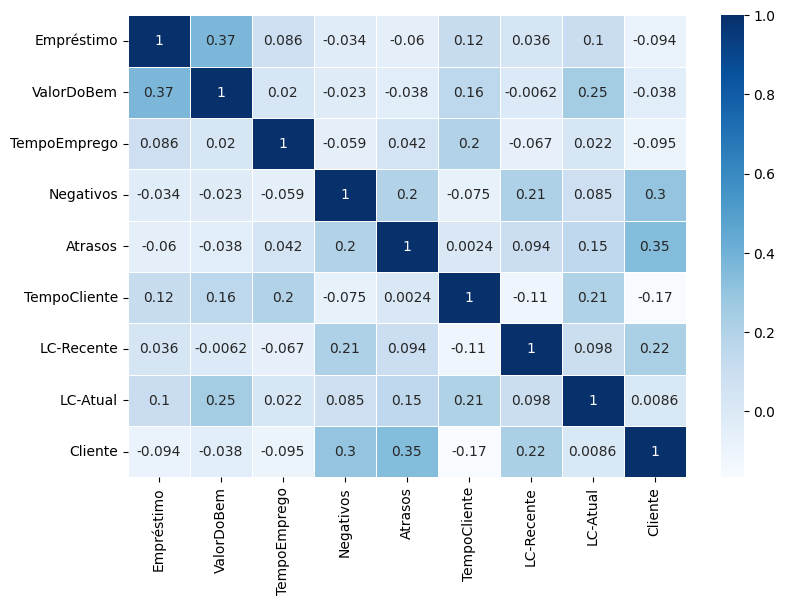

In [104]:
# Criando a matriz
plt.figure(figsize=(9,6))
sns.heatmap(df_num.corr(),annot = True, cmap='Blues',linewidth=.5);

* É possível observar uma correlação positiva entre a variável alvo 'Cliente' e as variáveis 'Negativos', 'Atrasos' e 'LC-Recente' sendo que a maior correlação é entre 'Cliente' e 'Atrasos', seguido por 'Cliente e Negativos'. Por se tratar de uma correlação positiva podemos afirmar que enquanto uma variável aumenta a outra também vai aumentar, ou seja, elas tendem a se mover na mesma direção.

* Vale destacar que a maior correlação que temos é entre a variável 'ValorDoBem' e 'Empréstimo', também apresentam uma correlação positiva.

## Variáveis que apresentaram maiores correlações em relação à variável alvo.

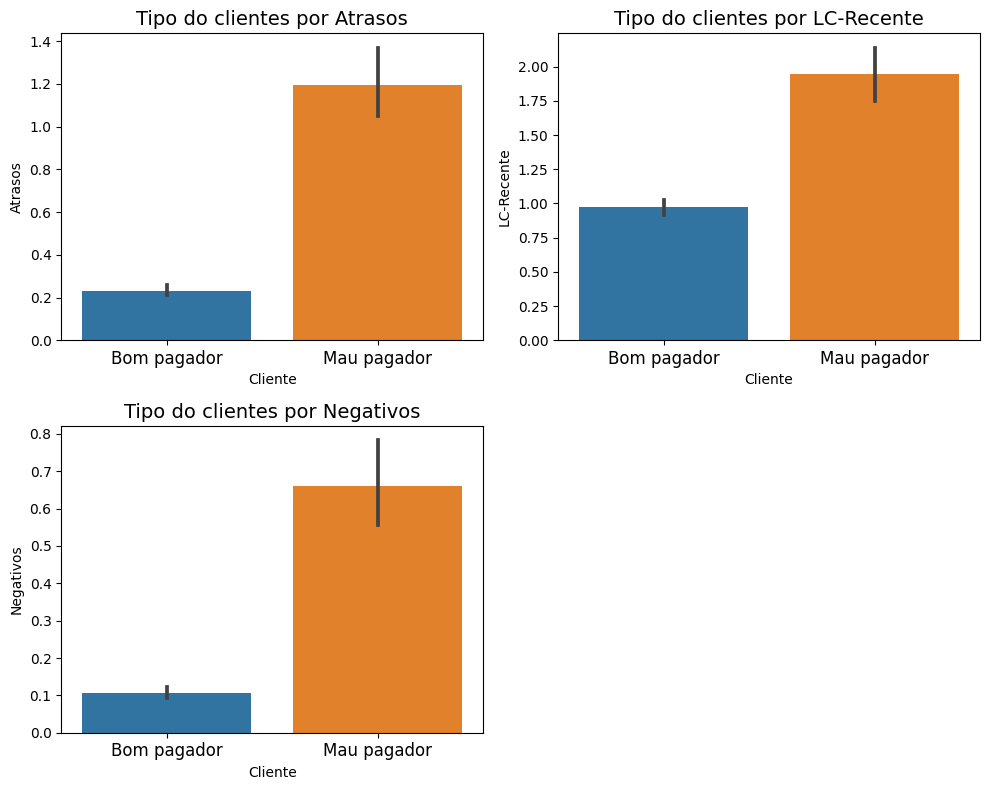

In [105]:
# Dimensões da figura
plt.figure(figsize=(10, 8))

# Grafico 1
plt.subplot(2,2,1)
# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='Atrasos')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por Atrasos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Grafico 2
plt.subplot(2,2,2)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='LC-Recente')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Grafico 3
plt.subplot(2,2,3)

grafico = sns.barplot(data=df, x='Cliente', y='Negativos')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por Negativos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)

plt.tight_layout()

Quanto maior o número de linhas de créditos atrasadas maiores são as chances do cliente ser um mau pagador, o mesmo se aplica aos clientes, com prerrogativas negativas e os clientes que adquiriram linhas de créditos recentes tendem a ser mau pagadores também.

## Variáveis que apresentaram menores correlações em relação à variável alvo.

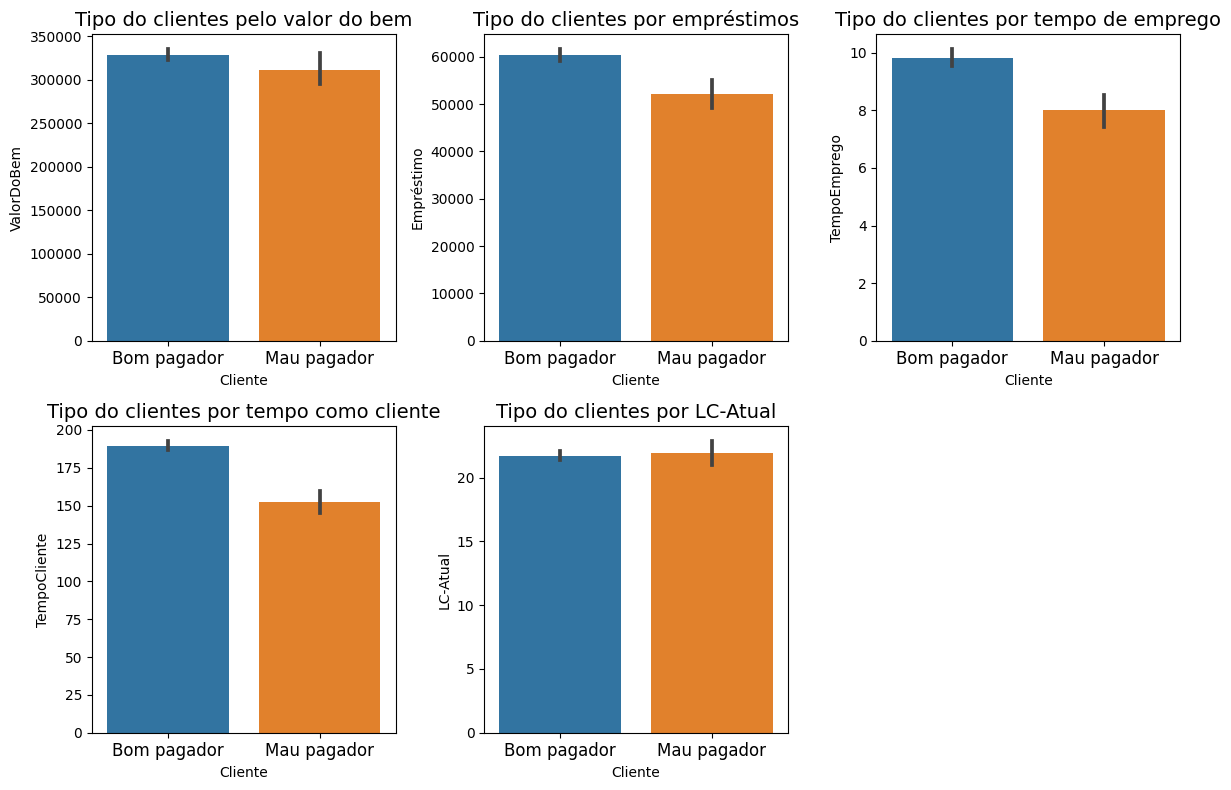

In [106]:
# Dimensões da figura
plt.figure(figsize=(12, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='ValorDoBem')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes pelo valor do bem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='Empréstimo')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por empréstimos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='TempoEmprego')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por tempo de emprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='TempoCliente')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por tempo como cliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='LC-Atual')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

*Podemos confirmar agora que essas variáveis não são tão impactantes em relação à variável alvo*

**Algumas anotações a respeito:**

*Podemos observar que quanto mais antigo o cliente maiores são as chances de que ele seja um bom pagador, quanto mais tempo o cliente tem de trabalho menores são as chances de que ele seja um mau pagador*

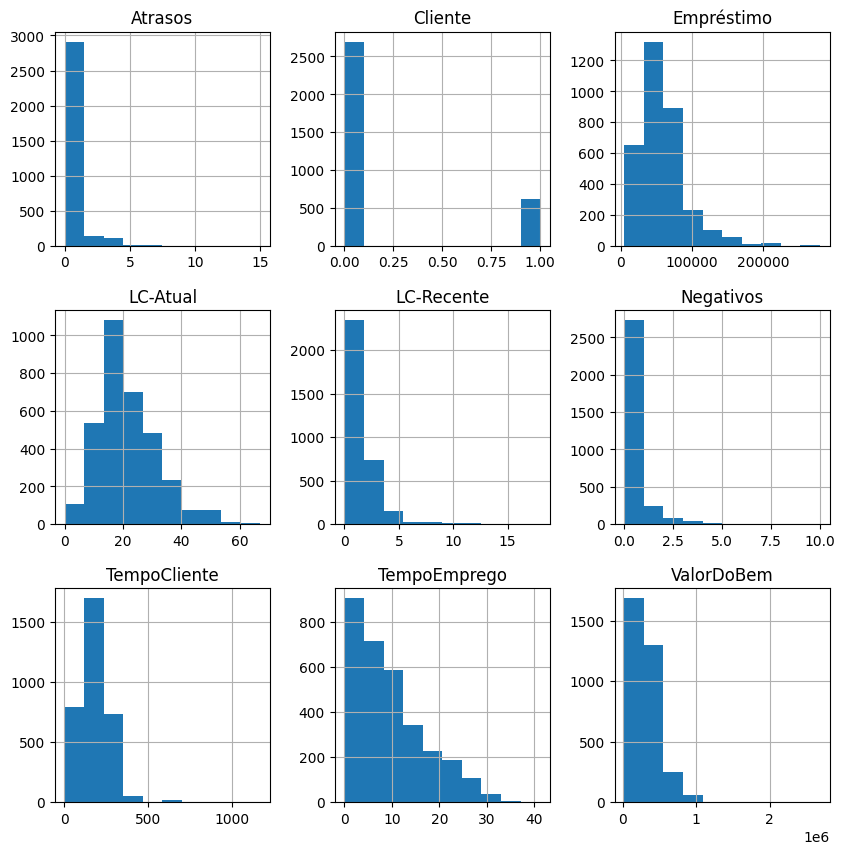

In [107]:
# Criando um histograma com todas as colunas do dataset
df.hist(figsize=(10,10));

* Podemos observar que na variável cliente

* Tempo Emprego é notável uma assimetria a direita, onde a maioria de nossos dados estão entre zero e 13 anos.

* Nota-se uma assimetria à direita na variável empréstimo, a maioria dos dados esta entre 0 e 70.000.

* Em valor do bem a maioria dos nossos dados estão entre 0 e 3 milhões.

* Na variável negativos observa-se menos de 75% dos clientes apresentam algum tipo de prerrogativas negativas.

* O mesmo se aplica aos clientes com algum tipo de atraso, os clientes que apresentam algum tipo de atraso representa menos de 75% da base de dados.

* Nossos clientes têm em média cerca de 182 meses como cliente, sendo que a maioria dos clientes está entre 1 mês e 232 meses.

* Nos últimos 2 anos 75% dos nossos clientes não tem mais que 2 linhas de créditos adquiridas, enquanto a maioria dos nossos.

* Podemos notar uma concentração nos dados por volta de 15 e 27, evidenciando que a maioria dos nossos clientes tem entre 15 e 27 linhas ativas.

# **4. Pré-Processamento**

Objetivos:

* Eliminar as variáveis que não serão utilizadas;
* Separar amostra dos dados
* Identificação de dados ausentes;
* Remoção de Outliers;
* Escala das variáveis

## **A. Eliminando variavies que não serão utilizadas.**

Por mais que algumas variáveis apresentem poucas influências, nenhuma delas pode ser descartada do dataset atualmente, então não existem variáveis a serem descartadas.

## **B. Tratando dados ausentes**

*Verificando quais as variáveis que tem dados faltantes.*

In [108]:
# Observando dados faltantes e ordenando em ordem decrescente
def percent_ausentes(df):
    p_faltantes = df.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns, 
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False) 

percent_ausentes(df)

,Variavéis,% de ausentes
8,RDS,0.197879
7,Negativos,0.053939
10,TempoEmprego,0.053939
0,Atrasos,0.030909
1,Cliente,0.000000
2,Emprego,0.000000
3,Empréstimo,0.000000
4,Finalidade,0.000000
5,LC-Atual,0.000000
6,LC-Recente,0.000000


### Variavel 'RDS'

Por se tratar de uma variável categórica, vou preencher os 19% de dados ausentes utilizando a moda.

In [109]:
# Pegando a moda da coluna 'RDS'
moda_rds = df['RDS'].mode()

# Observando a moda
moda_rds

0    37.0%
Name: RDS, dtype: object

In [110]:
# Substituindo os valores ausentes pela moda
df['RDS'].fillna('37.0%', inplace = True)

### Variavel 'TempoEmprego'

Antes de qualquer coisa, primeiro vamos checar se essa variável possui algum outlier.

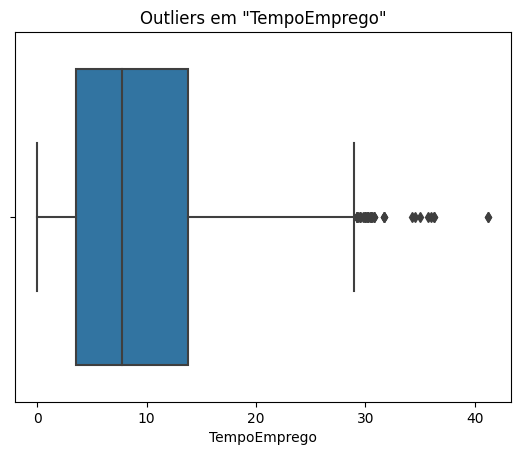

In [111]:
sns.boxplot(data = df, x = 'TempoEmprego').set_title('Outliers em "TempoEmprego"');

Por não possuir tantos outliers e a média e mediana está bem parelhas vou optar pela mediana.

In [112]:
# Pegando a mediana da coluna 'TempoEmprego'
mediana_temp = df['TempoEmprego'].median()

# Substituindo os valores ausentes pela TempoEmprego
df['TempoEmprego'] = df['TempoEmprego'].fillna(mediana_temp)

### Variavel 'Negativos'

Antes de qualquer coisa, primeiro vamos checar se essa variável possui algum outlier.

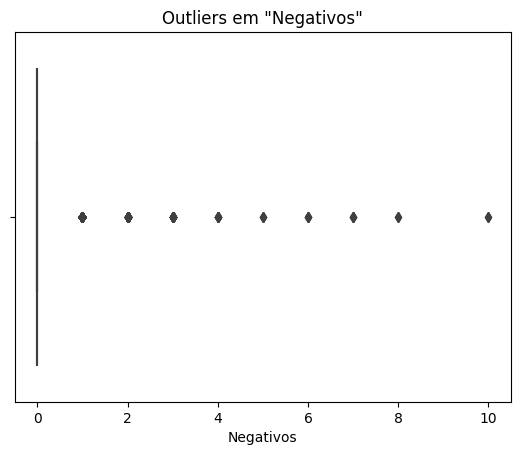

In [113]:
sns.boxplot(data = df, x = 'Negativos').set_title('Outliers em "Negativos"');

Como a variável 'Negativos', é composta pelo número de negativas que o cliente tem, esses valores que se sobressaem não podem ser considerados outliers sendo assim como também não há grande diferença entre a média e mediana, nesse caso vou utilizar a média.

In [114]:
# Pegando a média da coluna 'Negativos'
media_negativa = df['Negativos'].mean()

# Substituindo os valores ausentes pela Negativos
df['Negativos'] = df['Negativos'].fillna(media_negativa)

### Variavel 'Atrasos'

Antes de qualquer coisa, primeiro vamos checar se essa variável possui algum outlier.

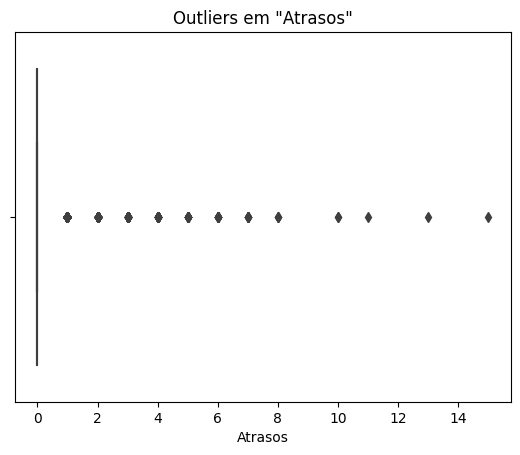

In [115]:
sns.boxplot(data = df, x = 'Atrasos').set_title('Outliers em "Atrasos"');

Como a variável 'Atrasos', é composta pelo número de linhas de atraso que o cliente tem, esses valores que se sobressaem não podem ser considerados outliers sendo assim como também não há grande diferença entre a média e mediana, nesse caso vou utilizar a média.

In [116]:
# Pegando a média da coluna 'Atrasos'
media_atrasos = df['Negativos'].mean()

# Substituindo os valores ausentes pela Atrasos
df['Atrasos'] = df['Atrasos'].fillna(media_atrasos)

Conferindo se ainda resta algum dado ausente.

In [117]:
# Observando dados faltantes e ordenando em ordem decrescente
def percent_ausentes(df):
    p_faltantes = df.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns, 
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False) 

percent_ausentes(df)

,Variavéis,% de ausentes
0,Atrasos,0.0
1,Cliente,0.0
2,Emprego,0.0
3,Empréstimo,0.0
4,Finalidade,0.0
5,LC-Atual,0.0
6,LC-Recente,0.0
7,Negativos,0.0
8,RDS,0.0
9,TempoCliente,0.0


*Com todos os dados ausentes devidamente tratados podemos ir para a próxima etapa.*

## **C. Remoção de outliers**

*Nessa etapa será feito uma verificação e remoção dos outliers*

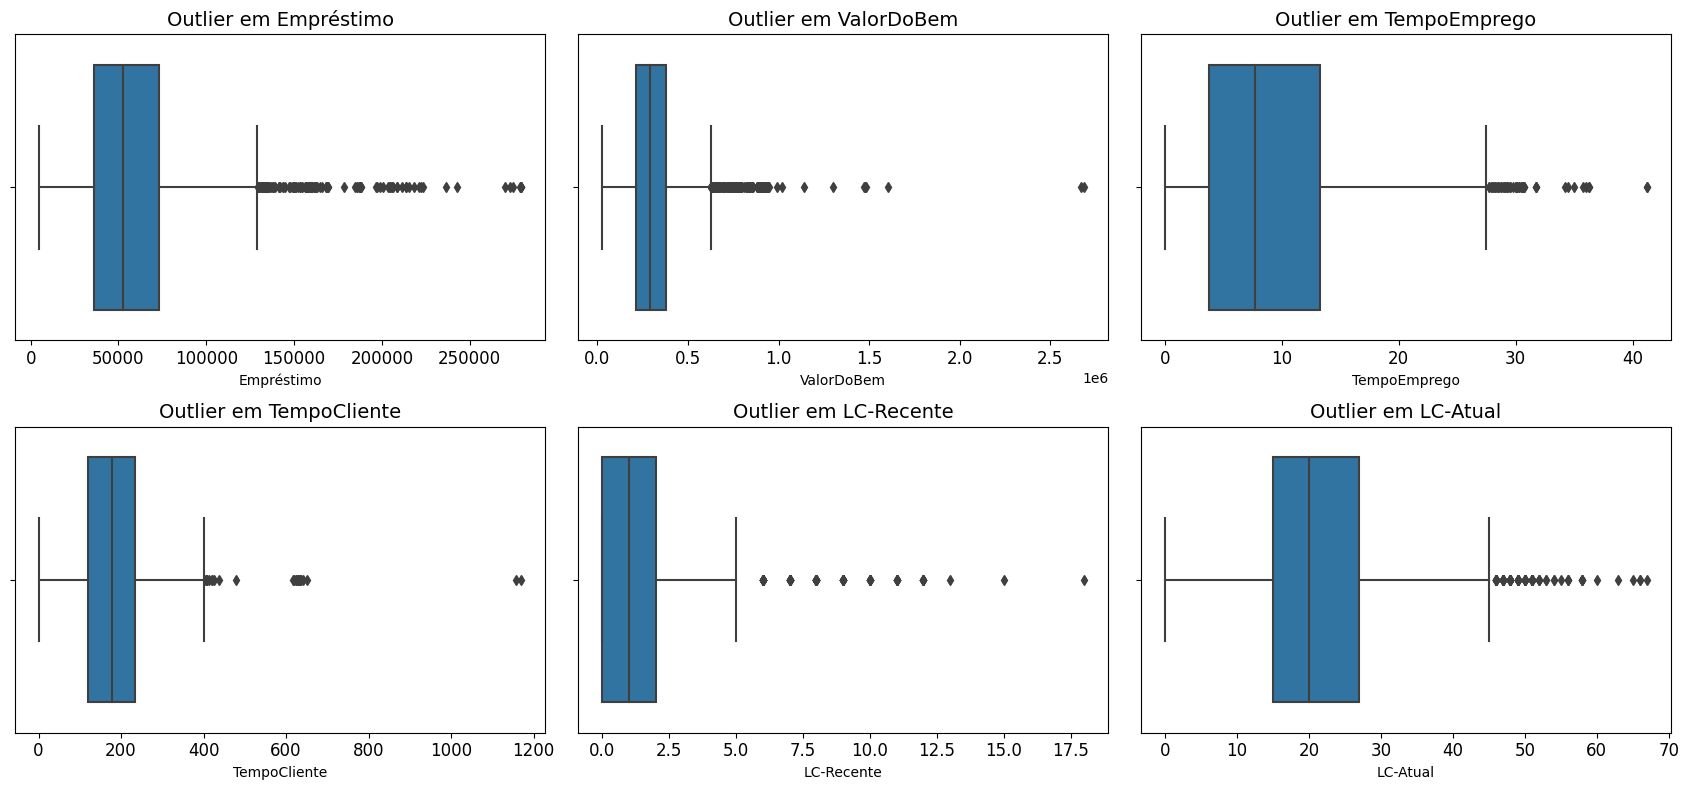

In [118]:
# Dimensões da figura
plt.figure(figsize=(17, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'Empréstimo')

# Definindo o titudo do grafico
grafico.set_title('Outlier em Empréstimo', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'ValorDoBem')

# Definindo o titudo do grafico
grafico.set_title('Outlier em ValorDoBem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)




# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'TempoEmprego')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoEmprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'TempoCliente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoCliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'LC-Recente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 6
plt.subplot(2,3,6)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'LC-Atual')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

###**A primeira variavel que vai passar pelo tratamento de outlier é 'Empréstimo'**

In [119]:
top_emprestimo = df['Empréstimo'].quantile(0.97)
top_emprestimo

143535.67999999967

Agora que o maior valor correspondente a 97% dos dados está armazenado na variável 'Empréstimo' o próximo passo é fazer o tratamento propriamente dito.

In [120]:
df.loc[df['Empréstimo'] > top_emprestimo, 'Empréstimo'] = top_emprestimo

Se algum valor na variável Empréstimo, for maior que a variável top_emprestimo esse valor vai ser substituído pelo valor da variável.

###**A próxima variável que vai passar pelo tratamento de outlier é 'ValorDoBem'**

In [121]:
top_ValorDoBem= df['ValorDoBem'].quantile(0.95)
top_ValorDoBem

645266.075

Agora que o maior valor correspondente a 95% dos dados está armazenado na variável 'ValorDoBem' o próximo passo é fazer o tratamento propriamente dito.

In [122]:
df.loc[df['ValorDoBem'] > top_ValorDoBem, 'ValorDoBem'] = top_ValorDoBem

*As próximas variáveis podem ter valores discrepantes, no entanto, eles podem não ser considerados outliers, por isso não vou tratá-los no momento.*

**Conferindo o resultado do tratamento**

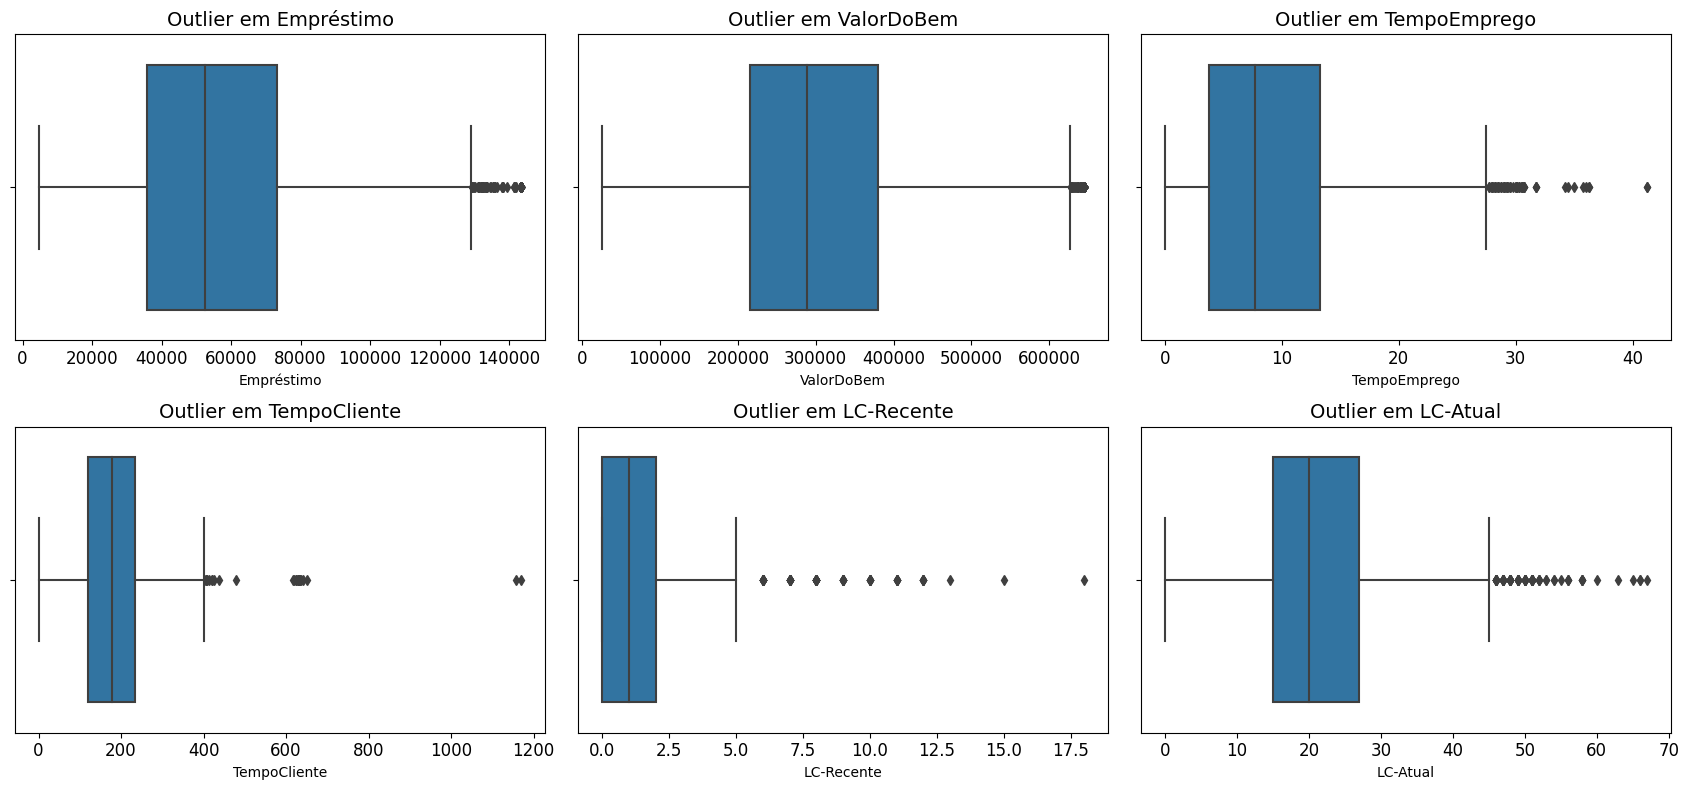

In [123]:
# Dimensões da figura
plt.figure(figsize=(17, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'Empréstimo')

# Definindo o titudo do grafico
grafico.set_title('Outlier em Empréstimo', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'ValorDoBem')

# Definindo o titudo do grafico
grafico.set_title('Outlier em ValorDoBem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)




# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'TempoEmprego')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoEmprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'TempoCliente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoCliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'LC-Recente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 6
plt.subplot(2,3,6)

# Criando o gráfico 
grafico = sns.boxplot(data=df, x = 'LC-Atual')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

*Outliers tratados*

## **D. Escala das Variáveis**

 **Processamento das variáveis categóricas:**

Para que os modelos possam atingir um bom desempenho faz-se necessário a transformação de uma variável categórica para uma variável numérica.

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis 

### **Coluna Finalidade**

A coluna finalidade é uma variavel categorica, então é necessario que ela passe por um tratamento para que o modelo de machine learning que vai ser criado tenha um melhor desempenho.

In [124]:
# Conferindo os valores em 'Finalidade'
df['Finalidade'].value_counts()

Diversas    2270
Reforma     1030
Name: Finalidade, dtype: int64

In [125]:
# Criando uma função para substituir os valores
def aux2(x):
  if x == 'Diversas':
    return 1
  elif x == 'Reforma':
    return 0

# Aplicando a função na coluna Finalidade
df['Finalidade'] = df['Finalidade'].apply(aux2) 

In [126]:
# Conferindo os valores em 'Finalidade'
df['Finalidade'].value_counts()

1    2270
0    1030
Name: Finalidade, dtype: int64

In [127]:
df.head()

,Atrasos,Cliente,Emprego,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,0,Outros,19468.0,0,33.0,0.0,0.0,39.2%,185.6,0.50,309447.00
1,0.0,0,Outros,91688.0,1,41.0,1.0,0.0,37.0%,234.5,15.25,449020.00
2,0.0,0,Outros,34226.0,0,10.0,0.0,0.0,37.2%,250.5,1.25,164394.70
3,0.0,0,Outros,48356.0,1,26.0,3.0,1.0,29.0%,230.4,2.25,270592.64
4,0.0,0,Professional,64684.0,1,18.0,0.0,0.0,21.0%,93.6,3.75,78167.16


### **Coluna emprego**

No tratamento dessa variavel em especifico vai ser necessario utilizar o One Hot Encoder que é uma técnica utilizada para transformar variáveis categóricas em variáveis numéricas.

In [128]:
# Observando os valores
df['Emprego'].value_counts()

Outros          1330
Professional     803
Geral            569
Gerente          433
Autônomo          97
Comissionado      68
Name: Emprego, dtype: int64

In [129]:
# Fazendo a instalação do modulo do category_encoders
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
# Importando o One Hot Encoders
from category_encoders.one_hot import OneHotEncoder

# Instanciando o ENC, definindo as colunas que serão transformadas e utilizando o proprio nomes delas
enc = OneHotEncoder(cols=['Emprego'], use_cat_names=True)

# Aplicando a transformação no DF
df_enc = enc.fit_transform(df)

In [131]:
# Observando os valores
df_enc.head()

,Atrasos,Cliente,Emprego_Outros,Emprego_Professional,Emprego_Geral,Emprego_Gerente,Emprego_Autônomo,Emprego_Comissionado,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,0,1,0,0,0,0,0,19468.0,0,33.0,0.0,0.0,39.2%,185.6,0.50,309447.00
1,0.0,0,1,0,0,0,0,0,91688.0,1,41.0,1.0,0.0,37.0%,234.5,15.25,449020.00
2,0.0,0,1,0,0,0,0,0,34226.0,0,10.0,0.0,0.0,37.2%,250.5,1.25,164394.70
3,0.0,0,1,0,0,0,0,0,48356.0,1,26.0,3.0,1.0,29.0%,230.4,2.25,270592.64
4,0.0,0,0,1,0,0,0,0,64684.0,1,18.0,0.0,0.0,21.0%,93.6,3.75,78167.16


### Variavel RDS

In [132]:
# Importando o Ordinal Encoder
from category_encoders.ordinal import OrdinalEncoder

# Instanciando o ENC, definindo as colunas que serão transformadas e utilizando o proprio nomes delas
onc = OrdinalEncoder(cols=['RDS'])

# Aplicando a transformação que já passou pelo one hot encoders
df_train = onc.fit_transform(df_enc)

In [133]:
# Observando os valores
df_train.head()

,Atrasos,Cliente,Emprego_Outros,Emprego_Professional,Emprego_Geral,Emprego_Gerente,Emprego_Autônomo,Emprego_Comissionado,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,0,1,0,0,0,0,0,19468.0,0,33.0,0.0,0.0,1,185.6,0.50,309447.00
1,0.0,0,1,0,0,0,0,0,91688.0,1,41.0,1.0,0.0,2,234.5,15.25,449020.00
2,0.0,0,1,0,0,0,0,0,34226.0,0,10.0,0.0,0.0,3,250.5,1.25,164394.70
3,0.0,0,1,0,0,0,0,0,48356.0,1,26.0,3.0,1.0,4,230.4,2.25,270592.64
4,0.0,0,0,1,0,0,0,0,64684.0,1,18.0,0.0,0.0,5,93.6,3.75,78167.16


### **Ajustando as escalas das Variáveis**

In [134]:
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Padronização
df_train[['Empréstimo','ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente',
    'LC-Recente', 'LC-Atual' ]] = sc.fit_transform(df_train[['Empréstimo','ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente', 'LC-Recente', 'LC-Atual']])

In [135]:
df_train.head()

,Atrasos,Cliente,Emprego_Outros,Emprego_Professional,Emprego_Geral,Emprego_Gerente,Emprego_Autônomo,Emprego_Comissionado,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,0.553059,0,1,0,0,0,0,0,-1.281742,0,1.135127,-0.680238,-0.300892,1,0.033875,-1.209567,-0.051543
1,-0.380347,0,1,0,0,0,0,0,1.138867,1,1.943286,-0.090436,-0.300892,2,0.601514,0.799081,0.929993
2,-0.380347,0,1,0,0,0,0,0,-0.787096,0,-1.188331,-0.680238,-0.300892,3,0.787245,-1.107432,-1.071612
3,-0.380347,0,1,0,0,0,0,0,-0.313499,1,0.427988,1.089167,1.113845,4,0.553921,-0.971253,-0.324784
4,-0.380347,0,0,1,0,0,0,0,0.233769,1,-0.380172,-0.680238,-0.300892,5,-1.034077,-0.766984,-1.678001


# **5. Modelos de Machine Learning**

Com a etapa e pré-processamento concluída, o próximo passo é a modelagem.

**Objetivos:**

* Definir quais os modelos serão utilizados;
* Selecionar o melhor modelo;
* Avaliar os modelos;

In [136]:
# Importações dos modelos que serão utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

**Fazendo as demais importações**



In [137]:
# Biblioteca algebra linear
import numpy as np 

# Importando metricas de validação
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Biblioteca para observação de métricas
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

# Tunagem de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Criando a validação
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

**Iniciando a escolha do melhor modelo**

Etapas:

* Separar os dados em variável preditora e a variável resposta;
* Definir uma lista de medidas;
* Criar uma lista de modelos;
* Renomear a lista de modelos;
* Criar um laço de repetição para exibir os modelos que estão sendo executados, aplicar uma validação cruzada para cada modelo presente na lista de modelos, tendo como argumento para o 'cv' a validação criada acima e o 'scoring', vai receber a lista de medidas que foi criado e por último exibir as métricas para seus respectivos modelos;

In [138]:
# Separando os dados em X e Y

# Variaveis preditoras
X = df_train.drop(['Cliente', 'RDS'], axis = 1)

# Ajustando a ordem das colunas do DF
X.sort_index(axis=1, inplace = True)

# Variavel resposta
y = df_train['Cliente']

In [139]:
# Criando uma lista com as medidas que serão analisadas
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

# Lista com o nome das medidas
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

# Criando uma lista com modelos selecionados
lista_de_modelos = [
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7)]

# Criando uma lista com os nomes dos modelos
nome_dos_modelos = [
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 150, prof = 5)', 
                        'Random Forest (arvs = 150, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 150, prof = 5)
Rodando modelo: Random Forest (arvs = 150, prof = 7)


*Agora que todos os modelos da lista foram testados hora de observar o melhor modelo com base no F1-Score*

In [140]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Bagging,0.903030,0.534730,0.905516,0.760944,0.668094
5-NN,0.883939,0.398109,0.950299,0.696542,0.558580
Árvore (prof = 7),0.865152,0.392411,0.772636,0.682802,0.517725
"Random Forest (arvs = 50, prof = 7)",0.874697,0.335709,0.974478,0.666830,0.496759
Árvore (prof = 5),0.860000,0.363882,0.764072,0.668632,0.489935
"Random Forest (arvs = 100, prof = 7)",0.873333,0.328160,0.974553,0.663055,0.488499
"Random Forest (arvs = 150, prof = 7)",0.873485,0.325754,0.981901,0.662224,0.486467
15-NN,0.853182,0.254852,0.853285,0.622401,0.390532
"Random Forest (arvs = 150, prof = 5)",0.853636,0.218218,0.979583,0.608550,0.354807
Árvore (prof = 3),0.836212,0.239291,0.683660,0.605958,0.350786


**Considerando a vital importância das métricas para avaliação dos modelos, vou utilizar uma função para exibir as métricas dos modelos criados em comparação com dados ainda não visto pelos modelos.**

In [141]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("acurácia: {:.5f}".format(accuracy_score(real, preditos)))
    print("precisão: {:.5f}".format(precision_score(real, preditos)))
    print("sensibilidade: {:.5f}".format(recall_score(real, preditos)))
    print("f1-score: {:.5f}".format(f1_score(real, preditos)))

**A curva ROC vai ser uma das métricas que será utilizada para avaliação do modelo, sendo assim uma função para a exibição da curva também vai ser criada.**

In [142]:
# Criando função para exibir a curva ROC
def plot_curva_roc(x, y):
    plt.plot(x, y, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

*Importando biblioteca para separação de dados*

In [143]:
# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

**Com os dados já separados entre treino e teste, agora sera feita a criação, treinamento e avaliação dos modelos**

 Criando o modelo que apresentou a melhor desempenho.

## *Utilizando o Oversampling*

**Pelo fato da variável alvo ser desbalanceada ela acaba comprometendo o desempenho do modelo, sendo assim utilizarei a técnica do oversampling SMOTE que consiste em balancear a classe positiva da variável que nesse caso se chama 'Cliente'.**

In [144]:
# Fazendo a importação do oversample
from imblearn.over_sampling import SMOTE

# Balanceamento da classe (Cliente)
oversample = SMOTE()

# Aplicando os registros da classe balanceada
X_over, y_over = oversample.fit_resample(X_treino, y_treino)

In [145]:
#ajustando a ordem
X_over.sort_index(axis=1, inplace = True)

**Criando e treinando o modelo com a classe balanceada**

In [146]:
# Criando o modelo
modelo = BaggingClassifier()

# Treinando o modelo
modelo.fit(X_over, y_over)

BaggingClassifier()

In [147]:
# Fazendo as predições
y_predito = modelo.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        512   20  532
1         41   87  128
All      553  107  660


In [148]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, y_predito)

acurácia: 0.90758
precisão: 0.81308
sensibilidade: 0.67969
f1-score: 0.74043


# **6. Tratamento dados de treino**

In [47]:
# Dados de teste
teste = pd.read_csv('/content/drive/MyDrive/Dados/testeFLAI_competicao.csv')

## **B. Tratando dados ausentes**

*Verificando quais as variáveis que tem dados faltantes.*

In [48]:
# Observando dados faltantes e ordenando em ordem decrescente
def percent_ausentes(teste):
    p_faltantes = teste.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': teste.columns, 
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False) 

percent_ausentes(teste)

,Variavéis,% de ausentes
10,RDS,0.219412
4,TempoEmprego,0.067059
5,Negativos,0.062941
6,Atrasos,0.025294
0,Empréstimo,0.000000
1,ValorDoBem,0.000000
2,Finalidade,0.000000
3,Emprego,0.000000
7,TempoCliente,0.000000
8,LC-Recente,0.000000


### Variavel 'RDS'

Por se tratar de uma variável categórica, vou preencher os 19% de dados ausentes utilizando a moda.

In [49]:
# Pegando a moda da coluna 'RDS'
moda_rds = teste['RDS'].mode()

# Observando a moda
moda_rds

0    36.8%
1    40.3%
Name: RDS, dtype: object

In [50]:
# Substituindo os valores ausentes pela moda
teste['RDS'].fillna('37.0%', inplace = True)

### Variavel 'TempoEmprego'

Antes de qualquer coisa, primeiro vamos checar se essa variável possui algum outlier.

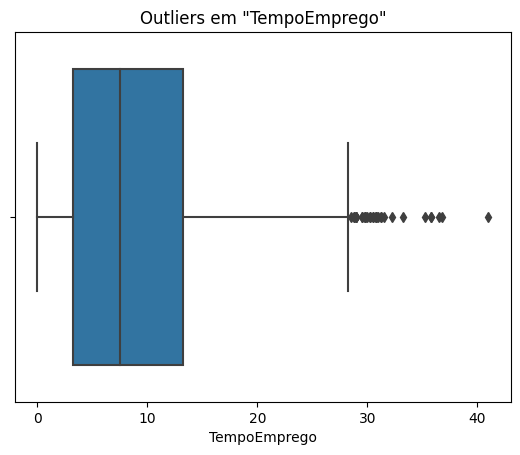

In [51]:
sns.boxplot(data = teste, x = 'TempoEmprego').set_title('Outliers em "TempoEmprego"');

Por não possuir tantos outliers e a média e mediana está bem parelhas vou optar pela mediana.

In [52]:
# Pegando a mediana da coluna 'TempoEmprego'
mediana_temp = teste['TempoEmprego'].median()

# Substituindo os valores ausentes pela TempoEmprego
teste['TempoEmprego'] = teste['TempoEmprego'].fillna(mediana_temp)

### Variavel 'Negativos'

Antes de qualquer coisa, primeiro vamos checar se essa variável possui algum outlier.

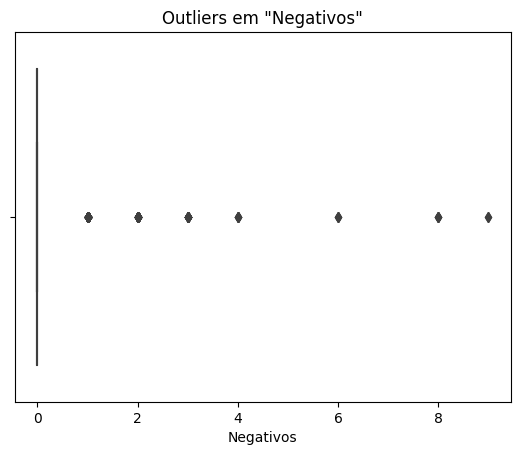

In [53]:
sns.boxplot(data = teste, x = 'Negativos').set_title('Outliers em "Negativos"');

Como a variável 'Negativos', é composta pelo número de negativas que o cliente tem, esses valores que se sobressaem não podem ser considerados outliers sendo assim como também não há grande diferença entre a média e mediana, nesse caso vou utilizar a média.

In [54]:
# Pegando a média da coluna 'Negativos'
media_negativa = teste['Negativos'].mean()

# Substituindo os valores ausentes pela Negativos
teste['Negativos'] = teste['Negativos'].fillna(media_negativa)

### Variavel 'Atrasos'

Antes de qualquer coisa, primeiro vamos checar se essa variável possui algum outlier.

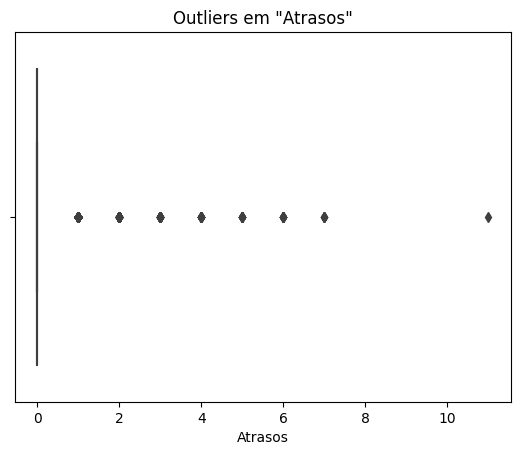

In [55]:
sns.boxplot(data = teste, x = 'Atrasos').set_title('Outliers em "Atrasos"');

Como a variável 'Atrasos', é composta pelo número de linhas de atraso que o cliente tem, esses valores que se sobressaem não podem ser considerados outliers sendo assim como também não há grande diferença entre a média e mediana, nesse caso vou utilizar a média.

In [56]:
# Pegando a média da coluna 'Atrasos'
media_atrasos = teste['Negativos'].mean()

# Substituindo os valores ausentes pela Atrasos
teste['Atrasos'] = teste['Atrasos'].fillna(media_atrasos)

Conferindo se ainda resta algum dado ausente.

In [57]:
# Observando dados faltantes e ordenando em ordem decrescente
def percent_ausentes(teste):
    p_faltantes = teste.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': teste.columns, 
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False) 

percent_ausentes(teste)

,Variavéis,% de ausentes
0,Empréstimo,0.0
1,ValorDoBem,0.0
2,Finalidade,0.0
3,Emprego,0.0
4,TempoEmprego,0.0
5,Negativos,0.0
6,Atrasos,0.0
7,TempoCliente,0.0
8,LC-Recente,0.0
9,LC-Atual,0.0


*Com todos os dados ausentes devidamente tratados podemos ir para a próxima etapa.*

## **C. Remoção de outliers**

*Nessa etapa será feito uma verificação e remoção dos outliers*

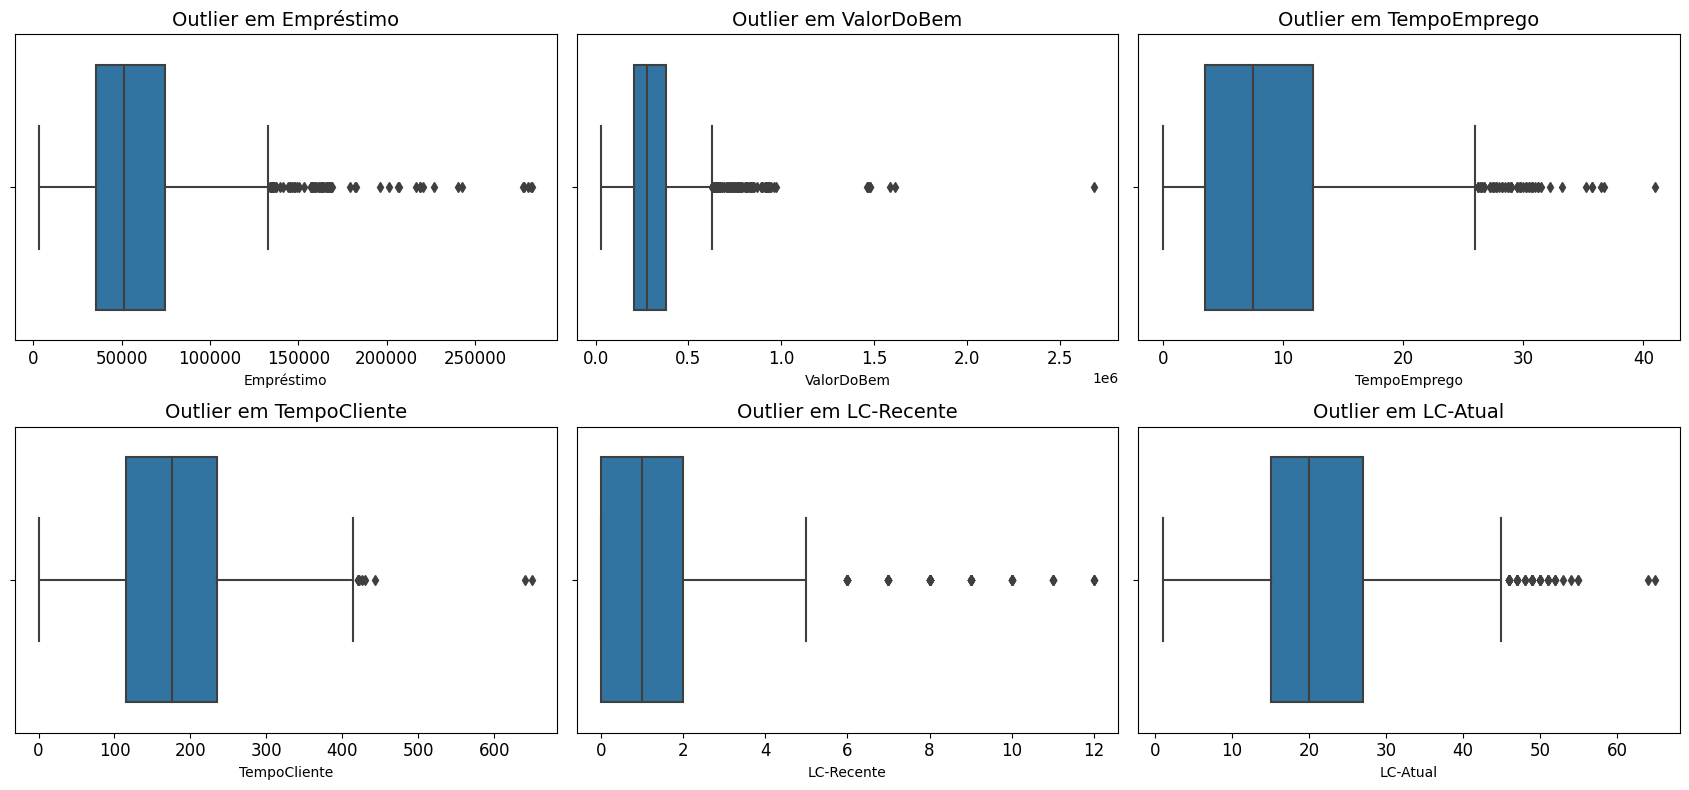

In [58]:
# Dimensões da figura
plt.figure(figsize=(17, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'Empréstimo')

# Definindo o titudo do grafico
grafico.set_title('Outlier em Empréstimo', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'ValorDoBem')

# Definindo o titudo do grafico
grafico.set_title('Outlier em ValorDoBem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)




# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'TempoEmprego')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoEmprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'TempoCliente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoCliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'LC-Recente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 6
plt.subplot(2,3,6)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'LC-Atual')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

###**A primeira variavel que vai passar pelo tratamento de outlier é 'Empréstimo'**

In [59]:
top_emprestimo = teste['Empréstimo'].quantile(0.97)
top_emprestimo

149492.25999999998

Agora que o maior valor correspondente a 97% dos dados está armazenado na variável 'Empréstimo' o próximo passo é fazer o tratamento propriamente dito.

In [60]:
teste.loc[teste['Empréstimo'] > top_emprestimo, 'Empréstimo'] = top_emprestimo

Se algum valor na variável Empréstimo, for maior que a variável top_emprestimo esse valor vai ser substituído pelo valor da variável.

###**A próxima variável que vai passar pelo tratamento de outlier é 'ValorDoBem'**

In [61]:
top_ValorDoBem = teste['ValorDoBem'].quantile(0.95)
top_ValorDoBem

657513.017

Agora que o maior valor correspondente a 95% dos dados está armazenado na variável 'ValorDoBem' o próximo passo é fazer o tratamento propriamente dito.

In [62]:
teste.loc[teste['ValorDoBem'] > top_ValorDoBem, 'ValorDoBem'] = top_ValorDoBem

*As próximas variáveis podem ter valores discrepantes, no entanto, eles podem não ser considerados outliers, por isso não vou tratá-los no momento.*

**Conferindo o resultado do tratamento**

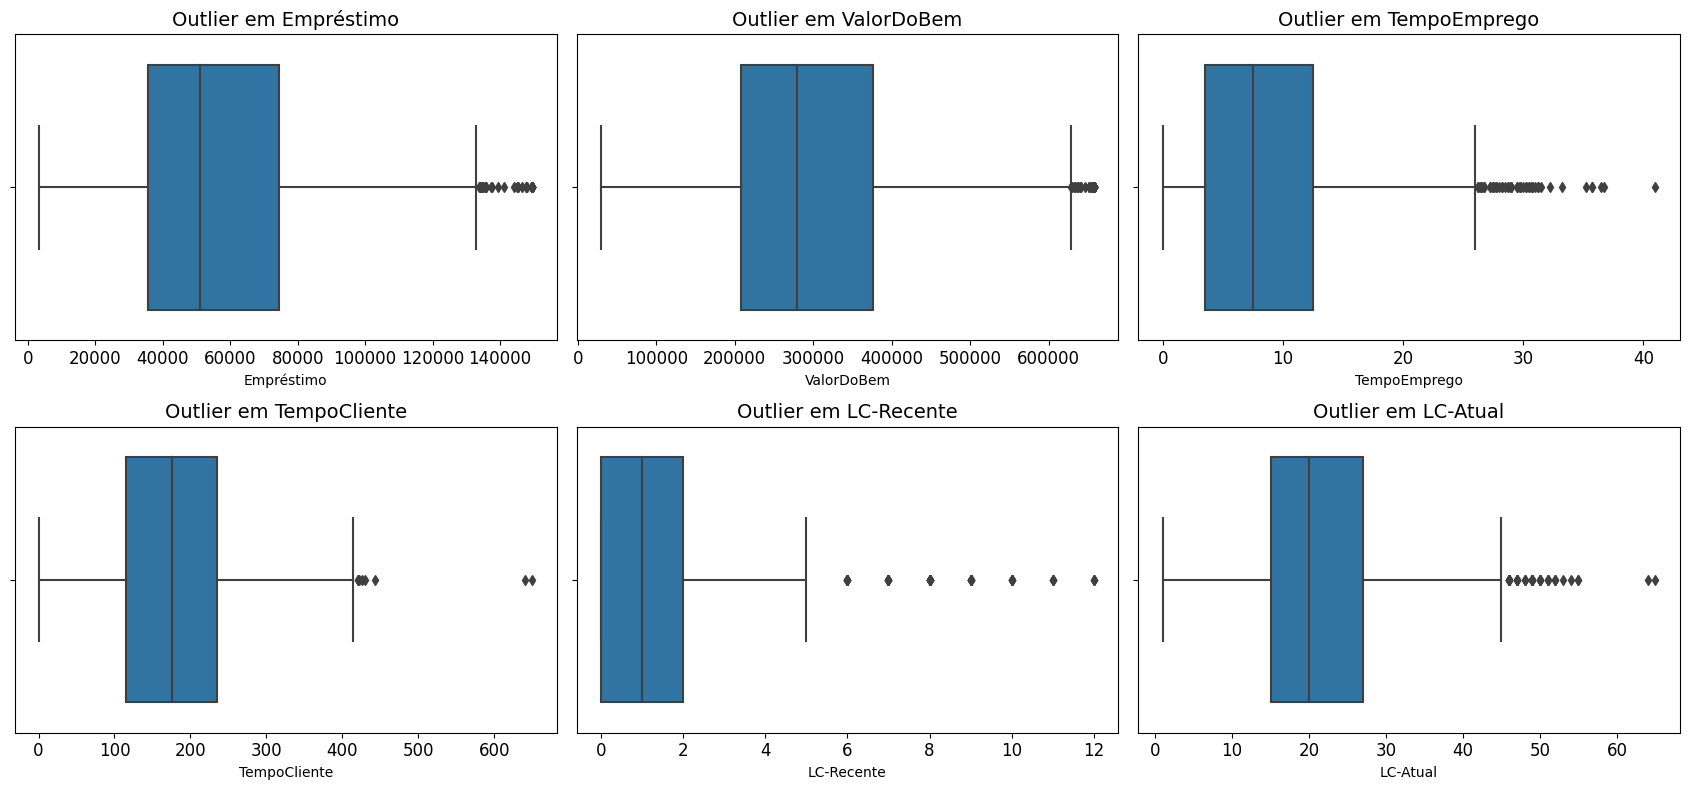

In [63]:
# Dimensões da figura
plt.figure(figsize=(17, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'Empréstimo')

# Definindo o titudo do grafico
grafico.set_title('Outlier em Empréstimo', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'ValorDoBem')

# Definindo o titudo do grafico
grafico.set_title('Outlier em ValorDoBem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)




# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'TempoEmprego')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoEmprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'TempoCliente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em TempoCliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'LC-Recente')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 6
plt.subplot(2,3,6)

# Criando o gráfico 
grafico = sns.boxplot(data=teste, x = 'LC-Atual')

# Definindo o titudo do grafico
grafico.set_title('Outlier em LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

*Outliers tratados*

## **D. Escala das Variáveis**

 **Processamento das variáveis categóricas:**

Para que os modelos possam atingir um bom desempenho faz-se necessário a transformação de uma variável categórica para uma variável numérica.

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis 

### **Coluna Finalidade**

A coluna finalidade é uma variavel categorica, então é necessario que ela passe por um tratamento para que o modelo de machine learning que vai ser criado tenha um melhor desempenho.

In [64]:
# Conferindo os valores em 'Finalidade'
teste['Finalidade'].value_counts()

Diversas    1180
Reforma      520
Name: Finalidade, dtype: int64

In [65]:
# Criando uma função para substituir os valores
def aux2(x):
  if x == 'Diversas':
    return 1
  elif x == 'Reforma':
    return 0

# Aplicando a função na coluna Finalidade
teste['Finalidade'] = teste['Finalidade'].apply(aux2) 

In [66]:
# Conferindo os valores em 'Finalidade'
teste['Finalidade'].value_counts()

1    1180
0     520
Name: Finalidade, dtype: int64

In [67]:
teste.head()

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,82582.0,342542.60,1,Geral,8.00,0.000000,0.0,407.7,0.0,43.0,41.3%
1,37680.0,233000.56,1,Geral,6.00,0.000000,0.0,100.3,2.0,14.0,25.5%
2,58404.0,218578.54,0,Geral,2.75,0.000000,0.0,133.1,0.0,17.0,34.7%
3,33284.0,255630.54,0,Outros,15.75,0.000000,0.0,239.8,1.0,35.0,36.7%
4,66882.0,315629.66,1,Geral,7.00,0.227244,0.0,101.4,1.0,18.0,34.0%


### **Coluna emprego**

No tratamento dessa variavel em especifico vai ser necessario utilizar o One Hot Encoder que é uma técnica utilizada para transformar variáveis categóricas em variáveis numéricas.

In [68]:
# Observando os valores
teste['Emprego'].value_counts()

Outros          713
Professional    370
Geral           286
Gerente         235
Autônomo         57
Comissionado     39
Name: Emprego, dtype: int64

In [69]:
# Fazendo a instalação do modulo do category_encoders
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# Importando o One Hot Encoders
from category_encoders.one_hot import OneHotEncoder

# Instanciando o ENC, definindo as colunas que serão transformadas e utilizando o proprio nomes delas
enc = OneHotEncoder(cols=['Emprego'], use_cat_names=True)

# Aplicando a transformação no DF
teste_enc = enc.fit_transform(teste)

In [71]:
# Observando os valores
teste_enc.head()

,Empréstimo,ValorDoBem,Finalidade,Emprego_Geral,Emprego_Outros,Emprego_Autônomo,Emprego_Professional,Emprego_Gerente,Emprego_Comissionado,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,82582.0,342542.60,1,1,0,0,0,0,0,8.00,0.000000,0.0,407.7,0.0,43.0,41.3%
1,37680.0,233000.56,1,1,0,0,0,0,0,6.00,0.000000,0.0,100.3,2.0,14.0,25.5%
2,58404.0,218578.54,0,1,0,0,0,0,0,2.75,0.000000,0.0,133.1,0.0,17.0,34.7%
3,33284.0,255630.54,0,0,1,0,0,0,0,15.75,0.000000,0.0,239.8,1.0,35.0,36.7%
4,66882.0,315629.66,1,1,0,0,0,0,0,7.00,0.227244,0.0,101.4,1.0,18.0,34.0%


### Variavel RDS

In [72]:
# Importando o Ordinal Encoder
from category_encoders.ordinal import OrdinalEncoder

# Instanciando o ENC, definindo as colunas que serão transformadas e utilizando o proprio nomes delas
onc = OrdinalEncoder(cols=['RDS'])

# Aplicando a transformação que já passou pelo one hot encoders
df_train = onc.fit_transform(df_enc)

In [73]:
# Observando os valores
df_train.head()

,Atrasos,Cliente,Emprego_Outros,Emprego_Professional,Emprego_Geral,Emprego_Gerente,Emprego_Autônomo,Emprego_Comissionado,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,0,1,0,0,0,0,0,19468.0,0,33.0,0.0,0.0,1,185.6,0.50,309447.00
1,0.0,0,1,0,0,0,0,0,91688.0,1,41.0,1.0,0.0,2,234.5,15.25,449020.00
2,0.0,0,1,0,0,0,0,0,34226.0,0,10.0,0.0,0.0,3,250.5,1.25,164394.70
3,0.0,0,1,0,0,0,0,0,48356.0,1,26.0,3.0,1.0,4,230.4,2.25,270592.64
4,0.0,0,0,1,0,0,0,0,64684.0,1,18.0,0.0,0.0,5,93.6,3.75,78167.16


### **Ajustando as escalas das Variáveis**

In [74]:
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Padronização
teste_enc[['Empréstimo','ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente',
    'LC-Recente', 'LC-Atual' ]] = sc.fit_transform(teste_enc[['Empréstimo','ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente', 'LC-Recente', 'LC-Atual']])

In [75]:
teste_enc = teste_enc.drop(columns = 'RDS', axis = 1)

In [85]:
# Ajustando a ordem das colunas do DF
teste_enc.sort_index(axis=1, inplace = True)

## Previsão nos dados

### *Submissão*

In [149]:
# Fazendo as predições nos dados de teste
predicoes = modelo.predict(teste_enc)
predicoes

array([0, 0, 0, ..., 0, 0, 1])

In [151]:
# Criando um DF, para armazenar os valores preditos
submissao = pd.DataFrame()

# Criando a coluna e armazenando as predições
submissao['Cliente'] = predicoes

# Alterando os valores preditos
submissao['Cliente'] = submissao['Cliente'].map({1: 'mau pagador', 0: 'bom pagador'}) 

# Observando os valores
submissao

,Cliente
0,bom pagador
1,bom pagador
2,bom pagador
3,bom pagador
4,bom pagador
...,...
1695,bom pagador
1696,bom pagador
1697,bom pagador
1698,bom pagador


In [152]:
submissao.value_counts()

Cliente    
bom pagador    1322
mau pagador     378
dtype: int64

In [ ]:
# Baixando o arquivo
#submissao.to_csv('submissão-bagging-01.csv', index = False)